<a href="https://colab.research.google.com/github/unt-iialab/INFO5731_Spring2020/blob/master/Assignments/INFO5731_Assignment_Three.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Three**

In this assignment, you are required to conduct information extraction, semantic analysis based on **the dataset you collected from assignment two**. You may use scipy and numpy package in this assignment.

# **Question 1: Understand N-gram**

(45 points). Write a python program to conduct N-gram analysis based on the dataset in your assignment two:

(1) Count the frequency of all the N-grams (N=3).

(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the **noun phrases** and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).


In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
from sklearn.feature_extraction.text import CountVectorizer

from nltk import pos_tag, word_tokenize
from nltk.chunk import ne_chunk
from nltk.tree import Tree
from nltk.corpus import stopwords
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer


In [2]:
df= pd.read_csv("John Wick_Chapter 4_reviews.csv")
df.head()

,Reviews
0,Imagine a video game where you are shooting ba...
1,"The Table, the international crminal brotherho..."
2,The first three John Wick films came in fairly...
3,These John Wick movies can be sort of fun in t...
4,I went to the cinema with great expectations. ...


In [3]:
# Function to preprocess and clean review
def review_preprocessing(review):
    # Remove punctuation and special characters
    review = ''.join([character for character in review if character not in string.punctuation])
    
    # Remove numbers
    review = ''.join([character for character in review if not character.isdigit()])
    
    # Tokenize the review
    words = nltk.word_tokenize(review)
    
    # Remove stopwords
    words = [w for w in words if w.lower() not in stopwords.words('english')]
    
    # Lowercase all words
    words = [w.lower() for w in words]
    
    # Stemming
    stemmer = PorterStemmer()
    words = [stemmer.stem(w) for w in words]
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(w) for w in words]
    
    # Join the words back into a cleaned sentence
    cleaned_user_reviews = ' '.join(words)
    
    return cleaned_user_reviews

df['Reviews'] = df['Reviews'].apply(review_preprocessing)


### (1) Count the frequency of all the N-grams (N=3).

In [4]:
# Getting the 'Reviews' column off 
reviews = df['Reviews']

In [5]:
# Construct an instance of the CountVectorizer class for use in N-gram analysis (N = 3).
ngram_vect = CountVectorizer(ngram_range=(3, 3))


In [6]:
# Fit and transform 
ngram_mat = ngram_vect.fit_transform(reviews)

In [7]:
# Obtain the names of the features (trigrams).
trigrams = ngram_vect.get_feature_names_out()

In [8]:
# Total all of the counts of each N-gram for all of the reviews.
ngram_counts = ngram_mat.sum(axis=0).A1

In [9]:
# Make a DataFrame to show the outcomes of the experiment.
output_df = pd.DataFrame({'Trigram': trigrams, 'Frequency': ngram_counts})


In [10]:
# Arrange the DataFrame's columns in descending order of frequency.
output_df = output_df.sort_values(by='Frequency', ascending=False)

#printing output
output_df

,Trigram,Frequency
1795,john wick movi,250
1785,john wick film,250
1774,john wick chapter,250
1790,john wick hour,150
1640,hour minut john,150
...,...,...
1235,film took get,50
1236,film tri top,50
1237,film troubl pace,50
1238,film typic mention,50


### (2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

In [11]:
# Getting the 'Reviews' column off 
reviews = df['Reviews']


In [12]:
# Construct an instance of the CountVectorizer class for bigram analysis (N=2)
bigram_vect = CountVectorizer(ngram_range=(2, 2))


In [13]:
# Fit and transform 
bigram_mat = bigram_vect.fit_transform(reviews)


In [14]:
# Obtain the names of the features  (bigrams)
bigrams = bigram_vect.get_feature_names_out()

In [15]:
#Total all of the counts of each bigram for all of the reviews.
bigram_counts = bigram_mat.sum(axis=0).A1

In [16]:
# Making a DataFrame to keep track of the bigram counts.
bigram_df = pd.DataFrame({'Bigram': bigrams, 'Count': bigram_counts})

# Apply the formula count(w2 w1) / count(w2) to arrive at the probability.
bigram_df['Probability'] = bigram_df['Count'] / bigram_df['Count'].groupby(bigram_df['Bigram'].str.split().str[1]).transform('sum')

#printing output
bigram_df[['Bigram', 'Probability']]


,Bigram,Probability
0,abl deliv,0.333333
1,abl find,0.200000
2,abl wait,0.500000
3,absenc polic,0.500000
4,absolut epicon,1.000000
...,...,...
3469,your suppos,1.000000
3470,youv seen,0.111111
3471,zaror anoth,0.250000
3472,zatoishilik blind,0.166667


### (3) Extract all the noun phrases and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).

In [17]:
df= pd.read_csv("John Wick_Chapter 4_reviews.csv")
df.head()

,Reviews
0,Imagine a video game where you are shooting ba...
1,"The Table, the international crminal brotherho..."
2,The first three John Wick films came in fairly...
3,These John Wick movies can be sort of fun in t...
4,I went to the cinema with great expectations. ...


In [18]:
# Function to preprocess and clean review
def review_preprocessing(review):
    # Remove punctuation and special characters
    review = ''.join([character for character in review if character not in string.punctuation])
    
    # Remove numbers
    review = ''.join([character for character in review if not character.isdigit()])
    
    # Tokenize the review
    words = nltk.word_tokenize(review)
    
    # Remove stopwords
    words = [w for w in words if w.lower() not in stopwords.words('english')]
    
    # Lowercase all words
    words = [w.lower() for w in words]
    
    # Stemming
    stemmer = PorterStemmer()
    words = [stemmer.stem(w) for w in words]
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(w) for w in words]
    
    # Join the words back into a cleaned sentence
    cleaned_user_reviews = ' '.join(words)
    
    return cleaned_user_reviews

df['Reviews'] = df['Reviews'].apply(review_preprocessing)


In [19]:
from nltk import pos_tag, word_tokenize, RegexpParser
# Getting the 'Reviews' column off 
reviews = df['Reviews']

In [20]:
# A function that will pull noun phrases out of a review.
def N_phrases(review):
    words = word_tokenize(review)
    t_w = pos_tag(words)
    
    # Figure out a chunking pattern for noun phrases.
    chunk_pattern = "NP: {<DT>?<JJ>*<NN>}"
    chunk_parser = RegexpParser(chunk_pattern)
    
    #Put the chunk parser to use.
    m_tree = chunk_parser.parse(t_w)
    
    # Remove the phrases containing nouns
    NP = []
    for subtree in m_tree.subtrees(filter=lambda t: t.label() == 'NP'):
        noun_phrase = " ".join([w for w, t in subtree.leaves()])
        NP.append(noun_phrase)
    
    return NP

In [21]:
# For every review, use the function.
all_N_P = reviews.apply(N_phrases)


In [22]:
# Combine all of the lists into one list of distinct noun phrases.
unique_all_N_P = list(set([p for ps in all_N_P for p in ps]))


In [23]:
# To analyse noun phrases, create an object called CountVectorizer.
N_P_vect = CountVectorizer(vocabulary=unique_all_N_P)

In [24]:
#Fit and transform the reviews to determine how frequently each noun phrase appears.
N_P_mat = N_P_vect.fit_transform(reviews)


In [25]:
# Creating  DataFrame 
N_P_df = pd.DataFrame(N_P_mat.toarray(), columns=unique_all_N_P)

In [26]:
# Calculating relative probabilities for each review
relative_prob = N_P_df.div(N_P_df.max(axis=1), axis=0)

relative_prob.head()


,whole movi,clear easi,script doctor,gunand,good minut,plethora,franchis john,franchis,hiroyuki,itim,...,passerbi,great height etc,thisth stori fine quit,reload,poorli,villain,end mention,buckl,simpli,entir
0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.142857,0.0,0.0,...,0.142857,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.142857,0.0
3,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.166667,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.166667,0.0
4,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.666667,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


# **Question 2: Undersand TF-IDF and Document representation**

(20 points). Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program:

(1) To build the **documents-terms weights (tf*idf) matrix bold text**.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using **cosine similarity**.

In [27]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [28]:
# Load the CSV file and extract the  reviews
df = pd.read_csv("John Wick_Chapter 4_reviews.csv")
df.head()

,Reviews
0,Imagine a video game where you are shooting ba...
1,"The Table, the international crminal brotherho..."
2,The first three John Wick films came in fairly...
3,These John Wick movies can be sort of fun in t...
4,I went to the cinema with great expectations. ...


In [29]:
# Function to preprocess and clean review
def review_preprocessing(review):
    # Remove punctuation and special characters
    review = ''.join([character for character in review if character not in string.punctuation])
    
    # Remove numbers
    review = ''.join([character for character in review if not character.isdigit()])
    
    # Tokenize the review
    words = nltk.word_tokenize(review)
    
    # Remove stopwords
    words = [w for w in words if w.lower() not in stopwords.words('english')]
    
    # Lowercase all words
    words = [w.lower() for w in words]
    
    # Stemming
    stemmer = PorterStemmer()
    words = [stemmer.stem(w) for w in words]
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(w) for w in words]
    
    # Join the words back into a cleaned sentence
    cleaned_user_reviews = ' '.join(words)
    
    return cleaned_user_reviews

df['Reviews'] = df['Reviews'].apply(review_preprocessing)



In [30]:
#Specifying a search query
query = "An outstanding movie with a haunting performance and best character development"

In [31]:
# Merge the inquiry with the feedback that has already been received
docs = df['Reviews'].tolist()
docs.append(query)

In [32]:
# Generate the TF-IDF matrix and save it.
vect = TfidfVectorizer()
tf_idf_matrix = vect.fit_transform(docs)


In [33]:
tf_idf_matrix

<1251x1414 sparse matrix of type '<class 'numpy.float64'>'
	with 141760 stored elements in Compressed Sparse Row format>

In [34]:
# Determine the query's cosine similarity to each document by comparing it to the query.
similarities = cosine_similarity(tf_idf_matrix[-1], tf_idf_matrix[:-1])
similarities

array([[0.        , 0.01001371, 0.0036026 , ..., 0.        , 0.01796735,
        0.        ]])

In [35]:
#Establish a DataFrame for the purpose of storing document indexes as well as their cosine similarity.
out_put_df = pd.DataFrame({
    'Documents': range(1, len(docs)),
    'Cosine Similarity': similarities[0]
})


In [36]:
# Arrange the papers according to their degree of cosine similarity.
out_put_df = out_put_df.sort_values(by='Cosine Similarity', ascending=False)

# Printing  the ranked documents
print("Ranked Documents:")
out_put_df


Ranked Documents:


,Documents,Cosine Similarity
783,784,0.019236
883,884,0.019236
183,184,0.019236
558,559,0.019236
158,159,0.019236
...,...,...
528,529,0.000000
530,531,0.000000
531,532,0.000000
532,533,0.000000


# **Question 3: Create your own word embedding model**

(20 points). Use the data you collected for assignment two to build a word embedding model:

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).

(2) Visualize the word embedding model you created.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

In [37]:
import pandas as pd
import numpy as np
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer

In [38]:
# Load the CSV file and extract the reviews
df = pd.read_csv("John Wick_Chapter 4_reviews.csv")
df.head()

,Reviews
0,Imagine a video game where you are shooting ba...
1,"The Table, the international crminal brotherho..."
2,The first three John Wick films came in fairly...
3,These John Wick movies can be sort of fun in t...
4,I went to the cinema with great expectations. ...


In [39]:
# Function to preprocess and clean review
def review_preprocessing(review):
    # Remove punctuation and special characters
    review = ''.join([character for character in review if character not in string.punctuation])
    
    # Remove numbers
    review = ''.join([character for character in review if not character.isdigit()])
    
    # Tokenize the review
    words = nltk.word_tokenize(review)
    
    # Remove stopwords
    words = [w for w in words if w.lower() not in stopwords.words('english')]
    
    # Lowercase all words
    words = [w.lower() for w in words]
    
    # Stemming
    stemmer = PorterStemmer()
    words = [stemmer.stem(w) for w in words]
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(w) for w in words]
    
    # Join the words back into a cleaned sentence
    cleaned_user_reviews = ' '.join(words)
    
    return cleaned_user_reviews

df['Reviews'] = df['Reviews'].apply(review_preprocessing)


In [40]:
# Tokenize the cleaned reviews
tok_rev = [nltk.word_tokenize(review) for review in df['Reviews']]

In [42]:
# Training a Word2Vec model
embedding_dim = 300
#model = Word2Vec(sentences=tok_rev, size=embedding_dim, window=5, min_count=1, workers=4)
model = Word2Vec(sentences=tok_rev, vector_size=embedding_dim, window=5, min_count=1, workers=4)


In [43]:
# Saving the trained model 
model.save("word2vec_model.bin")

In [45]:
# Visualize the Word2Vec embeddings
words = list(model.wv.key_to_index)
print(words)


['wick', 'film', 'action', 'john', 'movi', 'one', 'fight', 'get', 'scene', 'like', 'reev', 'franchis', 'hour', 'chapter', 'even', 'time', 'see', 'best', 'bad', 'look', 'go', 'first', 'kill', 'great', 'also', 'everi', 'mani', 'dont', 'much', 'end', 'high', 'charact', 'got', 'seri', 'keanu', 'minut', 'peopl', 'feel', 'make', 'ever', 'watch', 'shot', 'new', 'better', 'start', 'long', 'say', 'could', 'know', 'way', 'well', 'good', 'stori', 'realli', 'need', 'three', 'seen', 'yen', 'guy', 'come', 'bullet', 'love', 'final', 'head', 'play', 'mayb', 'star', 'rate', 'tabl', 'hit', 'everyth', 'never', 'set', 'yet', 'plot', 'take', 'seem', 'edit', 'bit', 'hope', 'doesnt', 'back', 'almost', 'gener', 'nonsens', 'expect', 'villain', 'littl', 'choreographi', 'least', 'thing', 'second', 'sequenc', 'noth', 'whole', 'sen', 'shoot', 'ridicul', 'instal', 'die', 'thought', 'man', 'runtim', 'pari', 'dumb', 'still', 'last', 'life', 'stahelski', 'everyon', 'deserv', 'dog', 'open', 'idea', 'anyth', 'sinc', 'ac

In [46]:
emb= np.array([model.wv[w] for w in words])
print(emb)

[[ 0.20633005  0.29594013  0.19014767 ...  0.2404662   0.24817216
  -0.13273707]
 [ 0.09807603  0.20253009 -0.05796709 ... -0.02014586  0.26739252
  -0.43911672]
 [ 0.18227687  0.14689073  0.16850114 ...  0.49872226  0.28024128
   0.35444322]
 ...
 [ 0.16227552 -0.09631891  0.00849948 ... -0.08927147  0.01870032
   0.11102591]
 [ 0.06246013 -0.127608    0.02552368 ...  0.0486353   0.3209293
   0.28597936]
 [-0.09473436  0.22267434 -0.07295707 ... -0.1590083   0.2910162
  -0.06912178]]


In [47]:
reduced_dim = TSNE(n_components=2, random_state=0, perplexity=min(30, emb.shape[0] - 1)).fit_transform(emb)


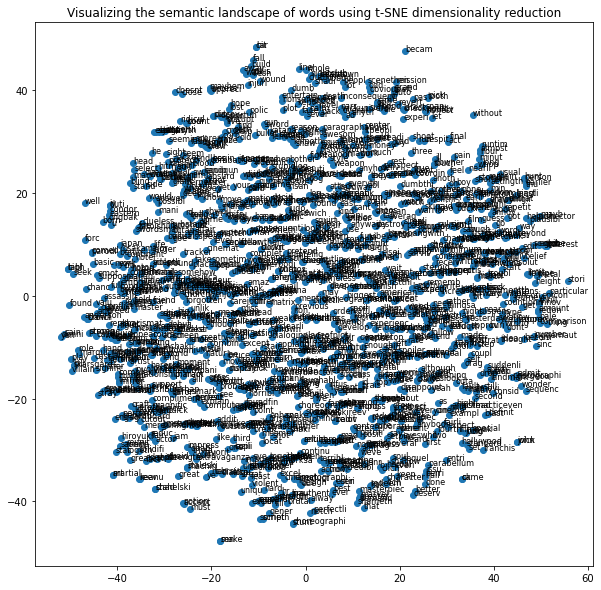

In [50]:
# Plotting scatter plot
plt.figure(figsize=(10, 10))
plt.scatter(reduced_dim[:, 0], reduced_dim[:, 1])

# Annotate some points with words for better interpretation
for i, word in enumerate(words):
    plt.annotate(word, xy=(reduced_dim[i, 0], reduced_dim[i, 1]), fontsize=8)
plt.title('Visualizing the semantic landscape of words using t-SNE dimensionality reduction')
plt.show()


In [ ]:
#Alternative 

In [176]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import umap

In [226]:
# Load the dataset
df = pd.read_csv("John Wick_Chapter 4_reviews.csv")


# Function to preprocess and clean review
def review_preprocessing(review):
    # Remove punctuation and special characters
    review = ''.join([character for character in review if character not in string.punctuation])
    
    # Remove numbers
    review = ''.join([character for character in review if not character.isdigit()])
    
    # Tokenize the review
    words = nltk.word_tokenize(review)
    
    # Remove stopwords
    words = [w for w in words if w.lower() not in stopwords.words('english')]
    
    # Lowercase all words
    words = [w.lower() for w in words]
    
    # Stemming
    stemmer = PorterStemmer()
    words = [stemmer.stem(w) for w in words]
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(w) for w in words]
    
    # Join the words back into a cleaned sentence
    cleaned_user_reviews = ' '.join(words)
    
    return cleaned_user_reviews

df['Reviews'] = df['Reviews'].apply(review_preprocessing)

df['Reviews'].head()

0    imagin video game shoot bad guy hardwar old ev...
1    tabl intern crminal brotherhood condemn john w...
2    first three john wick film came fairli quick s...
3    john wick movi sort fun sen unintellig violent...
4    went cinema great expect admit photographi gor...
Name: Reviews, dtype: object

In [227]:
#Tokenizing 
tok_reviews = [word_tokenize(review.lower()) for review in df['Reviews']]

In [228]:
tok_reviews

[['imagin',
  'video',
  'game',
  'shoot',
  'bad',
  'guy',
  'hardwar',
  'old',
  'everyth',
  'kind',
  'slow',
  'focu',
  'oppon',
  'set',
  'easi',
  'instal',
  'hack',
  'give',
  'invinc',
  'autoaim',
  'come',
  'slowli',
  'shout',
  'open',
  'weapon',
  'fire',
  'three',
  'four',
  'bullet',
  'run',
  'shoot',
  'anyth',
  'anyway',
  'use',
  'sniper',
  'explos',
  'trap',
  'kind',
  'cant',
  'even',
  'hit',
  'theyr',
  'next',
  'wield',
  'knife',
  'tri',
  'fight',
  'decent',
  'manner',
  'yet',
  'avatar',
  'move',
  'like',
  'year',
  'old',
  'man',
  'even',
  'autoaim',
  'still',
  'suck',
  'somehow',
  'get',
  'mani',
  'separ',
  'level',
  'noth',
  'make',
  'sen',
  'get',
  'big',
  'cinemat',
  'take',
  'cinemat',
  'k',
  'whatev',
  'feel',
  'like',
  'slow',
  'motionthat',
  'friend',
  'experi',
  'watch',
  'jw',
  'style',
  'peopl',
  'applaud',
  'first',
  'movi',
  'turn',
  'dement',
  'caricatur',
  'fight',
  'scene',
  '

In [229]:
# Train a Word2Vec model
embed_dim = 300

In [230]:
if gensim_version >= 4:
    model = Word2Vec(sentences=tokenized_reviews, vector_size=embed_dim, window=5, min_count=1, workers=4)
else:
    model = Word2Vec(sentences=tokenized_reviews, size=embed_dim, window=5, min_count=1, workers=4)


In [231]:
# Save the trained model (optional)
model.save("word2vec_model.bin")


In [232]:
word_vect = model.wv
word_vect

In [233]:
embedding = word_vect.vectors
embedding

array([[ 0.65857434,  1.018098  , -0.28252947, ..., -0.23208216,
         0.38148072,  0.22634694],
       [ 0.27062264,  0.20035137, -0.42171037, ..., -0.36973646,
         0.46297672,  0.60891414],
       [ 0.05467873,  0.1768439 , -0.11980809, ...,  0.42797413,
        -0.10533623,  0.466138  ],
       ...,
       [-0.0120282 ,  0.49814546, -0.15912743, ..., -0.19870548,
         0.03827998,  0.33629343],
       [ 0.0190952 ,  0.5766413 , -0.06429303, ...,  0.08415114,
        -0.03320261,  0.21703227],
       [ 0.01858288,  0.595008  , -0.08788353, ...,  0.08160551,
        -0.06154099,  0.17737138]], dtype=float32)

In [234]:
red = umap.UMAP()
embed_red = red.fit_transform(embeddings)
embed_red

array([[3.9414606, 4.895282 ],
       [3.9572177, 5.7893944],
       [3.9555373, 5.5783777],
       ...,
       [1.825804 , 4.6170816],
       [2.166588 , 6.045238 ],
       [2.298402 , 6.1256785]], dtype=float32)

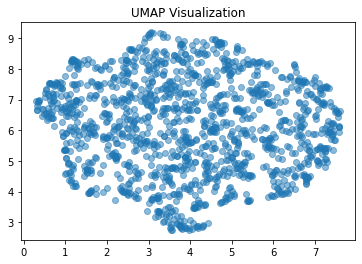

In [235]:
# Plotting the embeddings
plt.scatter(embed_red[:, 0], embed_red[:, 1], alpha=0.5)
plt.title('UMAP Visualization')
plt.show()

# **Question 4: Create your own training and evaluation data for sentiment analysis**

(15 points). **You dodn't need to write program for this question!** Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral). Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew. This datset will be used for assignment four: sentiment analysis and text classification.


In [250]:
# The GitHub link of your final csv file





### Link:
https://github.com/shyamsundar0329/ShyamSundar_INFO5731_Fall2023/blob/main/Annotated_John_wick_Reviews.csv
    
